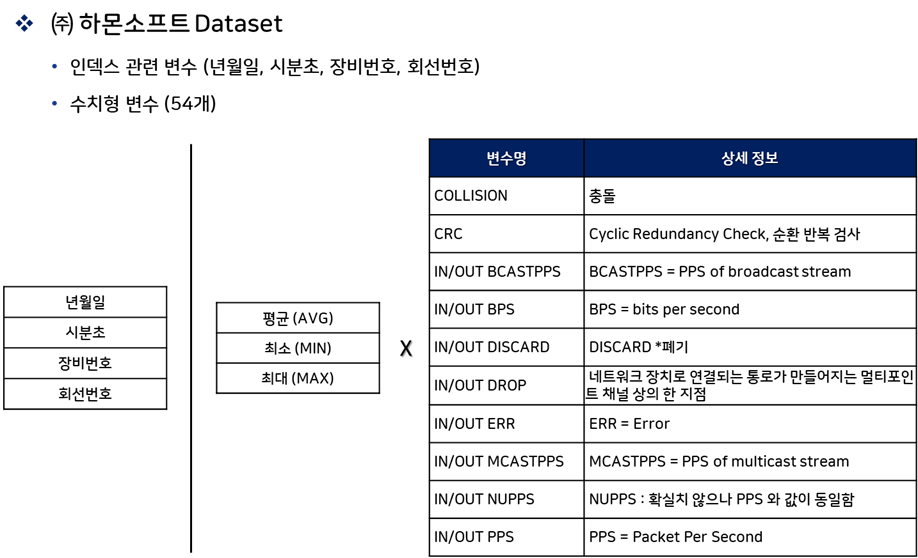

In [34]:
import os
import pandas as pd
import glob

In [35]:
os.getcwd()

'/repo/projects/HAI_timeseries/notebook/CES'

In [36]:
data_path = '/repo/projects/HAI_timeseries/Hamon_dataset/'
read_file = 'total_df.csv'

In [1]:
df = pd.read_csv(data_path+read_file)

NameError: name 'pd' is not defined

In [ ]:
df.columns

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df['HHMMSS'].value_counts(sort = False).plot.bar(title='My Title')

In [ ]:
df['MNG_NO'].value_counts(sort = False).plot.bar(title='My Title')

In [ ]:
df['MNG_NO'].value_counts(sort = False)

In [ ]:
for col in df.columns:
    print(f'{col} : {len(df[col].unique())}')

In [ ]:
len(df['MNG_NO'].unique())

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
desc = pd.DataFrame(df.describe())
desc.to_csv('description.csv')

In [ ]:
df['YYYYMMDD'].unique()

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [ ]:
from collections import Counter

In [ ]:
date_cnt = Counter(df['YYYYMMDD'])

# Change Counter to Dict
for key, value in date_cnt.items():
    date_cnt[key] = value

In [ ]:
date_cnt.keys()

In [ ]:
date_cnt.values()

## Get Count for Each Date

In [ ]:
plt.title("Bar Chart")

x = list(date_cnt.keys())
y = list(date_cnt.values())

xlabel = list(date_cnt.keys())

plt.bar(x, y)

plt.xticks(x, xlabel, rotation = 75)

plt.xlabel("date")
plt.ylabel("cnt")

plt.show()

In [ ]:
cols = list(df.columns)
cols

In [ ]:
vis_cols = []

for col in cols:
    if ('MIN' in col) or ('MAX' in col) or ('AVG' in col):
        i, j = col.split('_')
        vis_cols.append(j)

print(vis_cols)

In [ ]:
vis_cols = list(set(vis_cols))
print(vis_cols)

In [ ]:
print(cols)

In [ ]:
check_cols = ['BPS', 'DISCARD', 'ERR', 'NUPPS', 'PPS']

In [21]:
dates = list(date_cnt.keys())
dates

[20210620, 20210621, 20210622, 20210623, 20210624, 20210625, 20210626]

In [22]:
dates_df = pd.DataFrame(df['YYYYMMDD'])
dates_df.head()

,YYYYMMDD
0,20210620
1,20210620
2,20210620
3,20210620
4,20210620


In [23]:
df[['YYYYMMDD','MIN_OUTERR','MAX_OUTERR','AVG_OUTERR']].iloc[:,1:]

,MIN_OUTERR,MAX_OUTERR,AVG_OUTERR
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
23195123,0,0,0
23195124,0,0,0
23195125,0,0,0
23195126,0,0,0


In [24]:
df[['MIN_OUTERR','MAX_OUTERR','AVG_OUTERR']].iloc[:,0]

0           0
1           0
2           0
3           0
4           0
           ..
23195123    0
23195124    0
23195125    0
23195126    0
23195127    0
Name: MIN_OUTERR, Length: 23195128, dtype: int64

In [25]:
save_path = '/repo/projects/timeseries_anomaly/EDA/results'

In [26]:
#vis_cols = ['INERR', 'OUTDROP', 'INNUPPS', 'OUTNUPPS', 'INDISCARD', 'INBCASTPPS']

In [27]:
for vis_col in vis_cols:
    print(f'vis_col: {vis_col}')
    tmp_cols = []
    
    for col in cols:
        #print(f'>>>>>col: {col}')
        if vis_col in col:
            tmp_cols.append(col)
        
    #print(tmp_cols)
    #print('--------------------')
    tmp_df = df[tmp_cols]
    
    # make tmp dataframe
    tmp_df = pd.concat([dates_df, tmp_df], axis = 1)
    
    # for dates
    for date in dates:
        print(f'>>> plotting {date}')
        
        # use data at certain date
        date_df = tmp_df[tmp_df['YYYYMMDD']==date].iloc[:,1:]
        
        criteria = ['MAX', 'MIN', 'AVG']
        
        for c in criteria:
            
            if c == 'AVG':
                plot_df = date_df.iloc[:,0]
            elif c == 'MIN':
                plot_df = date_df.iloc[:,1]
            elif c == 'MAX':
                plot_df = date_df.iloc[:,2]
                
            # define fig
            fig = plt.figure()

            plot_df.plot(figsize = (12, 6))

            plt.title(f'{c}_{vis_col}({date}) ')

            plt.savefig(save_path+ f"/{c}_{vis_col}_{date}.png", dpi=200)
            
            plt.close('all')

vis_col: INERR
>>> plotting 20210620
>>> plotting 20210621
>>> plotting 20210622
>>> plotting 20210623
>>> plotting 20210624
>>> plotting 20210625
>>> plotting 20210626
vis_col: OUTDROP
>>> plotting 20210620
>>> plotting 20210621
>>> plotting 20210622
>>> plotting 20210623
>>> plotting 20210624
>>> plotting 20210625
>>> plotting 20210626
vis_col: INNUPPS
>>> plotting 20210620
>>> plotting 20210621
>>> plotting 20210622
>>> plotting 20210623
>>> plotting 20210624
>>> plotting 20210625
>>> plotting 20210626
vis_col: OUTNUPPS
>>> plotting 20210620
>>> plotting 20210621
>>> plotting 20210622
>>> plotting 20210623
>>> plotting 20210624
>>> plotting 20210625
>>> plotting 20210626
vis_col: INDISCARD
>>> plotting 20210620
>>> plotting 20210621
>>> plotting 20210622
>>> plotting 20210623
>>> plotting 20210624
>>> plotting 20210625
>>> plotting 20210626
vis_col: INBCASTPPS
>>> plotting 20210620
>>> plotting 20210621
>>> plotting 20210622
>>> plotting 20210623
>>> plotting 20210624
>>> plotting 2

In [28]:
for vis_col in vis_cols:
    print(f'vis_col: {vis_col}')
    tmp_cols = []
    
    for col in cols:
        #print(f'>>>>>col: {col}')
        if vis_col in col:
            tmp_cols.append(col)
        
    #print(tmp_cols)
    #print('--------------------')
    tmp_df = df[tmp_cols]
    
    # make tmp dataframe
    tmp_df = pd.concat([dates_df, tmp_df], axis = 1)
    
    # for dates
    for date in dates:
        print(f'> plotting {date}')
        
        # use data at certain date
        date_df = tmp_df[tmp_df['YYYYMMDD']==date].iloc[:,1:]
        
        criteria = ['MAX', 'MIN', 'AVG']
        
        for c in criteria:
            
            if c == 'AVG':
                plot_df = date_df.iloc[:,0]
                plot_avg = plot_df.mean()
                plot_min = plot_df.min()
                plot_max = plot_df.max()
                print(f'>> AVG(MIN): {plot_min}')
                print(f'>> AVG(AVG): {plot_avg}')
                print(f'>> AVG(MAX): {plot_max}')

            elif c == 'MIN':
                plot_df = date_df.iloc[:,1]
                plot_avg = plot_df.mean()
                plot_min = plot_df.min()
                plot_max = plot_df.max()
                print(f'>> MIN(MIN): {plot_min}')
                print(f'>> MIN(AVG): {plot_avg}')
                print(f'>> MIN(MAX): {plot_max}')
            elif c == 'MAX':
                plot_df = date_df.iloc[:,2]
                plot_avg = plot_df.mean()
                plot_min = plot_df.min()
                plot_max = plot_df.max()
                print(f'>> MAX(MIN): {plot_min}')
                print(f'>> MAX(AVG): {plot_avg}')
                print(f'>> MAX(MAX): {plot_max}')

vis_col: INERR
> plotting 20210620
>> MAX(MIN): 0
>> MAX(AVG): 0.0009929763219236904
>> MAX(MAX): 103
>> MIN(MIN): 0
>> MIN(AVG): 0.0009929763219236904
>> MIN(MAX): 103
>> AVG(MIN): 0
>> AVG(AVG): 0.0009929763219236904
>> AVG(MAX): 103
> plotting 20210621
>> MAX(MIN): 0
>> MAX(AVG): 0.1070327038198467
>> MAX(MAX): 9360
>> MIN(MIN): 0
>> MIN(AVG): 0.1070327038198467
>> MIN(MAX): 9360
>> AVG(MIN): 0
>> AVG(AVG): 0.1070327038198467
>> AVG(MAX): 9360
> plotting 20210622
>> MAX(MIN): 0
>> MAX(AVG): 0.21545382251356252
>> MAX(MAX): 12166
>> MIN(MIN): 0
>> MIN(AVG): 0.21545382251356252
>> MIN(MAX): 12166
>> AVG(MIN): 0
>> AVG(AVG): 0.21545382251356252
>> AVG(MAX): 12166
> plotting 20210623
>> MAX(MIN): 0
>> MAX(AVG): 0.1899605151255562
>> MAX(MAX): 20995
>> MIN(MIN): 0
>> MIN(AVG): 0.1899605151255562
>> MIN(MAX): 20995
>> AVG(MIN): 0
>> AVG(AVG): 0.1899605151255562
>> AVG(MAX): 20995
> plotting 20210624
>> MAX(MIN): 0
>> MAX(AVG): 0.3504950319532711
>> MAX(MAX): 87505
>> MIN(MIN): 0
>> MIN(AV